<a href="https://colab.research.google.com/github/jpcampos04/Sprint6_project/blob/main/c9422a73_b3ae_49fc_a64f_3d6d61cab188.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¡Hola, Jose!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Jose! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis.

Sigue con el excelente trabajo!
</div>

## Introducción

Este proyecto se basa en una base de datos histórica de una tienda especializada en la venta de videojuegos. A partir de esta información, se busca analizar diversos aspectos del mercado, como el número de lanzamientos de videojuegos por año, el total de ventas por plataforma, las plataformas y géneros más populares, así como el promedio de vida útil de una consola.

Además, se pretende identificar la tendencia de ventas para los próximos años y determinar las plataformas más rentables para invertir en nuevos lanzamientos. También se analizará el impacto de las calificaciones y clasificaciones en las ventas, se elaborará un perfil de usuario por región y se estudiará el dominio de distintas plataformas en diferentes mercados.

### Inicialización

In [ ]:
# Cargar timport pandas as pd
import pandas as pd
import numpy as np
from scipy import stats as st

### Cargar datos

In [ ]:
# Carga el archivo de datos en un Dataframe
df_games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.
</div>

## Descripción de los datos

In [ ]:
# Imprime los encabezados de las columnas
print(df_games.columns)
print()
print(df_games.head())
print()
print(df_games.tail())
print()
print(df_games.info())
print()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8 

**Primera revisión de datos**

En una primera revisión de los datos se puede observar:
 - El nombre de la columnas no se encuentra en un formato adecuado.
 - Los tipos de datos del año de lanzamiento y calificación del usuario no son correctos.
 - Existen valores ausentes en la columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating.
 - Es necesario revisar si no hay valores duplicados en las columnas genre y platform.
 - La columna name parece tener caracteres especiales por lo que es necesario verificar si afectan o no.

## Procesamiento de datos

### Preparar datos

In [ ]:
# Corrige el formato del nombre de las columnas
print(df_games.columns)
print()
# Accede al indice actual y lo renombra con minusculas
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Corregir datos

In [ ]:
# Define función
def era_group(year):

    if year < 2000:
        return 'retro'
    elif year < 2010:
        return 'modern'
    elif year >= 2010:
        return 'recent'
    else:
        return 'unknown'

# Añade una columna categorica según los años en los que fueron lanzados
df_games['era_group'] = df_games['year_of_release'].apply(era_group)
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating era_group  
0     28.96      3.77         8.45          76.0          8      E    modern  
1      3.58      6.81         0.77           NaN        NaN    NaN     retro  
2     12.76      3.79         3.29          82.0        8.3      E    modern  
3     10.93      3.28         2.95          80.0          8      E    modern  
4      8.89     10.22         1.00           NaN        NaN    NaN     retro  


In [ ]:
# Cambia el tipo de objeto a datetime
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y')
print(df_games['year_of_release'].head())

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: year_of_release, dtype: datetime64[ns]


In [ ]:
# Busca valores ausentes
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
era_group             0
dtype: int64


**Datos ausentes**

Los datos ausentes se trataran de la siguiente manera:
 - Aquellos de las columna name y genre se sustituiran con la palabra Unknown.
 - Aquellos de la columna year_of release se eliminaran debido a que este dato es indispensable para el posterior analisis.
 - Aquellos de las columnas critic_score,user_score y rating se analizaran si existen valores atípicos para sustituirlos ya sea con la media, la mediana o 0.

In [ ]:
# Sustitución de valores ausentes
df_games['name'] = df_games['name'].fillna('Unknown')
df_games['genre'] = df_games['genre'].fillna('Unknown')

print(df_games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
era_group             0
dtype: int64


In [ ]:
# Elimina la filas con valores ausentes
df_games = df_games.dropna(subset=['year_of_release'])

print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
era_group             0
dtype: int64


6607 valores ausentes
9839 valores no ausentes
2376 valores iguales a tbd

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64



<AxesSubplot:xlabel='user_score'>

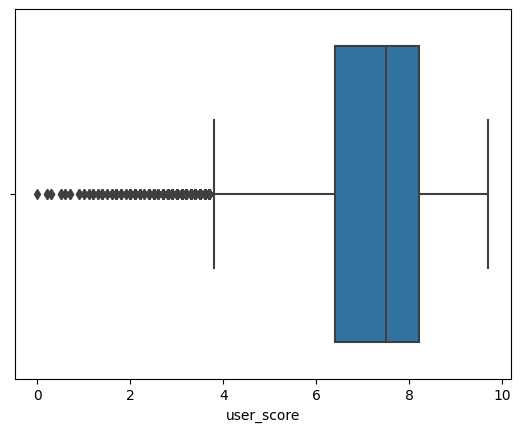

In [ ]:
# Analiza la columna 'user_score'
# Cuenta los valores ausentes
print(df_games['user_score'].isna().sum(), 'valores ausentes')

# Cuenta los valores no ausentes
print(df_games[~df_games['user_score'].isna()]['user_score'].count(), 'valores no ausentes')

# Cuenta los valores iguales a tbd
print(df_games[df_games['user_score'] == 'tbd']['user_score'].count(), 'valores iguales a tbd')
print()

# Extrae los valores de la columna 'user_score'
score_not_tbd = df_games[df_games['user_score'] != 'tbd']['user_score'].dropna()

# Convierte la serie de objeto a flotante
score_not_tbd = pd.to_numeric(score_not_tbd, errors= 'coerce')
print(score_not_tbd.describe())
print()

import seaborn as sns
sns.boxplot(score_not_tbd)

**Toma de decisiones justificación**

Al analiza la columna 'user_score' se observan valores atípicos una vez que se analizaron unicamente los valores que poseen una calificación por lo que se decide que tanto los valores ausentes así como los valores tbd sean remplazados con 0 para no alterar la muestra.

In [ ]:
# Reemplaza los valores tbd con 0 y sustituye valores ausentes con 0
df_games['user_score'] = df_games['user_score'].replace('tbd', 0).fillna(0)

print(df_games.isna().sum())

# Convierte la serie de objeto a flotante
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors= 'coerce')

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score            0
rating             6678
era_group             0
dtype: int64


8463 valores ausentes
7983 valores no ausentes

Plataformas con más calificaciones de los críticos
platform
DC        14
WiiU      90
PSV      119
3DS      166
XOne     169
PS       196
PS4      252
GBA      430
GC       437
PSP      456
Wii      568
PC       699
XB       706
DS       708
PS3      804
X360     894
PS2     1275
Name: critic_score, dtype: int64

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16446 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16446 non-null  object        
 4   n

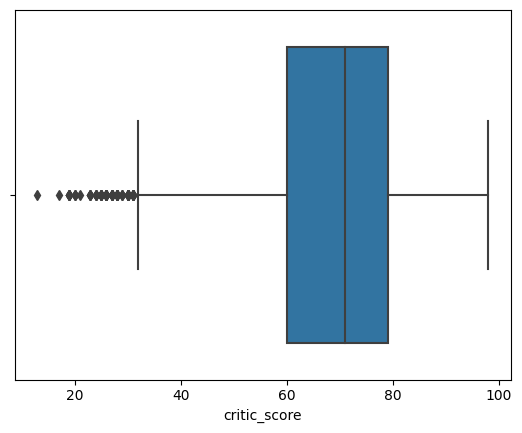

In [ ]:
# Analiza la columna 'critic_score'
# Cuenta los valores ausentes
print(df_games['critic_score'].isna().sum(), 'valores ausentes')

# Cuenta los valores no ausentes
print(df_games[~df_games['critic_score'].isna()]['critic_score'].count(), 'valores no ausentes')
print()

print('Plataformas con más calificaciones de los críticos')
df_critic_most_ranked = df_games[~df_games['critic_score'].isna()].groupby('platform')['critic_score'].count().sort_values()

print(df_critic_most_ranked)
print()

# Extrae los valores no nulos de la columna 'critic_score'
score_not_nan = df_games[~df_games['critic_score'].isna()]['critic_score']

print(score_not_nan.describe())
print()

import seaborn as sns
sns.boxplot(score_not_nan)
df_games.info()

**Toma de decisiones justificación**

Al analiza la columna 'critic_score' se observan valores atípicos por lo que se decide que sean remplazados con 0 para no alterar la muestra.

In [ ]:
# Sustituye los valores ausentes con 0
df_games['critic_score'] = df_games['critic_score'].fillna(0)

print(df_games.isna().sum())
print()

# Verifica que no se eliminaron los valores anteriores
print(df_games[df_games['critic_score'] != 0]['critic_score'].count(), 'valores originales.')
print()

df_games.info()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6678
era_group             0
dtype: int64

7983 valores originales.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16446 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16446 non-null  object        
 4   na_sales         16446 non-null  float64       
 5   eu_sales         16446 non-null  float64       
 6   jp_sales         16446 non-null  float64       
 7   other_sales      16446 non-null  float64       
 8   critic_score     16446 non-n

In [ ]:
# Analiza la columna 'ratings'
# Cuenta los valores ausentes
print(df_games['rating'].isna().sum(), 'valores ausentes')

# Cuenta los valores no ausentes
print(df_games[~df_games['rating'].isna()]['rating'].count(), 'valores no ausentes')

# Sustitución de valores ausentes
df_games['rating'] = df_games['rating'].fillna('Unrated')

print(df_games.isna().sum())
print()

print(df_games['rating'].sample(5))

6678 valores ausentes
9768 valores no ausentes
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
era_group          0
dtype: int64

3178           T
2834           E
4930     Unrated
5188           T
14249    Unrated
Name: rating, dtype: object


In [ ]:
df_games.info()

print(df_games.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16446 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16446 non-null  object        
 4   na_sales         16446 non-null  float64       
 5   eu_sales         16446 non-null  float64       
 6   jp_sales         16446 non-null  float64       
 7   other_sales      16446 non-null  float64       
 8   critic_score     16446 non-null  float64       
 9   user_score       16446 non-null  float64       
 10  rating           16446 non-null  object        
 11  era_group        16446 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 1.6+ MB
                       name platform year_of_release         genre  na_sales  

**Datos duplicados**

In [ ]:
# Busqueda de duplicados
print('El DataFrame tiene los siguientes duplicados:')
print(df_games['name'].duplicated().sum())
print()

df_games = df_games.sort_values(by='name', ascending=False)
print(df_games['name'].unique())
print()

print(df_games['name'].value_counts())
print()

games_name = df_games.groupby('name')['name'].count()
print(games_name)

El DataFrame tiene los siguientes duplicados:
5019

['¡Shin Chan Flipa en colores!' 'uDraw Studio: Instant Artist'
 'uDraw Studio' ... " Frozen: Olaf's Quest" ' Fire Emblem Fates'
 ' Beyblade Burst']

Need for Speed: Most Wanted                      12
FIFA 14                                           9
LEGO Marvel Super Heroes                          9
Ratatouille                                       9
The LEGO Movie Videogame                          8
                                                 ..
Game no Kanzume Vol 1                             1
Midway's Greatest Arcade Hits Volume 1            1
Super Robot Taisen α                              1
Touch Shot! Love Application                      1
Sherlock Holmes: Secret of The Silver Earring     1
Name: name, Length: 11427, dtype: int64

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
           

In [ ]:
# Busqueda de duplicados
print('El DataFrame tiene los siguientes duplicados:')
print(df_games['platform'].duplicated().sum())
print()

df_games = df_games.sort_values(by='platform', ascending=False)

# Identifica los valores unicos de plataformas
print(df_games['platform'].unique())
print()

# Cuenta los valores por plataforma
print(df_games['platform'].value_counts())

El DataFrame tiene los siguientes duplicados:
16415

['XOne' 'XB' 'X360' 'WiiU' 'Wii' 'WS' 'TG16' 'SNES' 'SCD' 'SAT' 'PSV'
 'PSP' 'PS4' 'PS3' 'PS2' 'PS' 'PCFX' 'PC' 'NG' 'NES' 'N64' 'GG' 'GEN' 'GC'
 'GBA' 'GB' 'DS' 'DC' '3DS' '3DO' '2600']

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


### Enriquecer datos

In [ ]:
# Calcula el total de ventas para cada juego
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

print(df_games.head())

                                  name platform year_of_release    genre  \
16188  Darksiders: Warmastered Edition     XOne      2016-01-01   Action   
11222                         Rugby 15     XOne      2015-01-01   Sports   
738                 Forza Motorsport 5     XOne      2013-01-01   Racing   
1798                  Sunset Overdrive     XOne      2014-01-01  Shooter   
1904                   Forza Horizon 3     XOne      2016-01-01   Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16188      0.01      0.00      0.00         0.00          80.0         7.9   
11222      0.03      0.05      0.00         0.01          20.0         3.1   
738        1.21      0.79      0.01         0.19          79.0         5.9   
1798       0.63      0.40      0.00         0.10          81.0         7.7   
1904       0.42      0.58      0.00         0.08          91.0         7.4   

      rating era_group  total_sales  
16188      M    recent         0.01 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas.

Además, realizaste un análisis de valores nulos

## Analisis de datos

In [ ]:
# Cuenta los valores por periodo
df_year_of_release = df_games['year_of_release'].value_counts().sort_index()

print(df_year_of_release)

1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      62
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: year_of_release, dtype: int64


**Análisis 1**

Se observa un crecimiento del número de lanzamientos, llegando a su punto cuspide en el año 2008 y a partir de este un descenso de hasta 35% al año 2016.

In [ ]:
# Agrupa el Dataframe por plataforma y suma el total de ventas
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values()

print(platform_sales)

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.77
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64


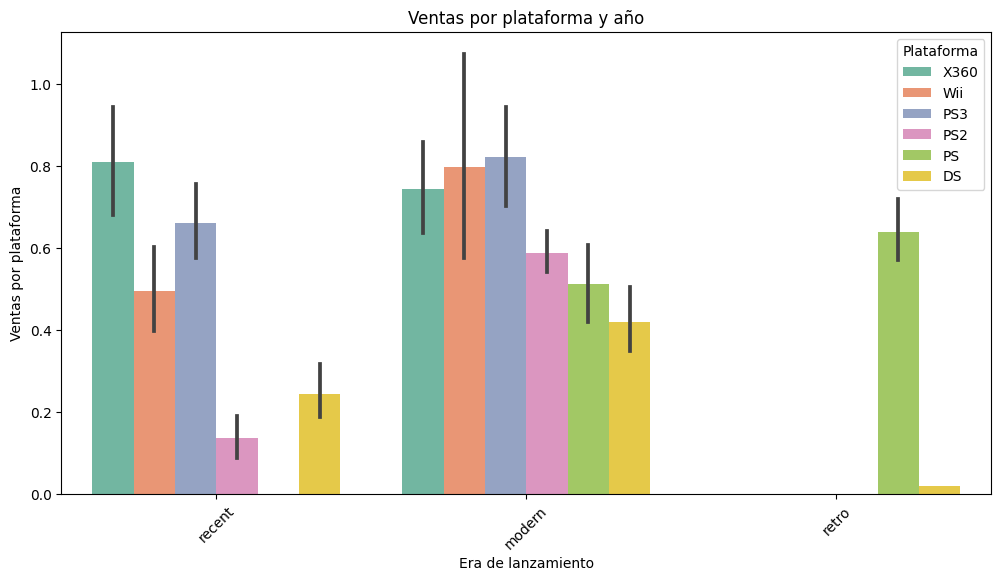

In [ ]:
# Plataformas populares
popular_platform = ['PS','DS', 'Wii', 'PS3', 'X360','PS2']
df_popular_platform = df_games[df_games['platform'].isin(popular_platform)][['platform', 'era_group', 'total_sales']]

#print(df_popular_platform)

# Agrupa el Dataframe a partir de plataforma y año de lanzamiento y suma la ventas totales
sales_per_platform_year = df_popular_platform.groupby(['era_group','platform'])['total_sales'].sum()

#print(sales_per_platform_year)

#Gráfica
from matplotlib import pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Gráfico de barras con color por plataforma
sns.barplot(data=df_popular_platform,
            x="era_group",
            y="total_sales",
            hue="platform",
            palette="Set2")  # Puedes cambiar la paleta de colores

# Configurar título y etiquetas
plt.title("Ventas por plataforma y año")
plt.xlabel("Era de lanzamiento")
plt.ylabel("Ventas por plataforma")
plt.xticks(rotation=45)
plt.legend(title="Plataforma")

# Mostrar la gráfica
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, solamente para visualizar mejor los resultaod te recomiendo crar una columna de label en la base de tal manera que solamente coloquemos un periodo de tiempo y los valores con difernetes colores para cada consola

<div class="alert alert-block alert-info">
    Espero sea lo requerido
   

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

**Análisis 2**

De acuerdo a lo observado el promedio de vida de una plataforma es de 10 años mientra que las ventas llegan a su climax en promedio 4 años despues de su lanzamiento.

**Análisis 3**

Los datos que tomaré para un modelo para el 2017 será los datos de 2012 a 2016 debido a que son los más consistentes de los últimos años.

In [ ]:
# Segmenta el Dataframe a partir del año 2012
df_games_2012 = df_games[df_games['year_of_release'].dt.year >= 2012]

print(df_games_2012)

                                                 name platform  \
16188                 Darksiders: Warmastered Edition     XOne   
11222                                        Rugby 15     XOne   
738                                Forza Motorsport 5     XOne   
1798                                 Sunset Overdrive     XOne   
1904                                  Forza Horizon 3     XOne   
...                                               ...      ...   
16143                           Azure Striker Gunvolt      3DS   
8934     Hoppechan: Tsukutte! Asonde! Punipuni Town!!      3DS   
8046     Hatsune Miku and Future Stars: Project Mirai      3DS   
7142                    Hatsune Miku: Project Mirai 2      3DS   
16554  Horse Life 4: My Horse, My Friend, My Champion      3DS   

      year_of_release    genre  na_sales  eu_sales  jp_sales  other_sales  \
16188      2016-01-01   Action      0.01      0.00      0.00         0.00   
11222      2015-01-01   Sports      0.03      0.05   

In [ ]:
# Agrupa el Dataframe por plataforma y suma el total de ventas
platform_lider = df_games_2012.groupby('platform')['total_sales'].sum().sort_values()

print(platform_lider)

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.79
PS4     314.14
Name: total_sales, dtype: float64


platform  year_of_release
PS3       2012-01-01         107.36
          2013-01-01         113.25
          2014-01-01          47.76
          2015-01-01          16.82
          2016-01-01           3.60
PS4       2013-01-01          25.99
          2014-01-01         100.00
          2015-01-01         118.90
          2016-01-01          69.25
X360      2012-01-01          99.74
          2013-01-01          88.58
          2014-01-01          34.74
          2015-01-01          11.96
          2016-01-01           1.52
Name: total_sales, dtype: float64


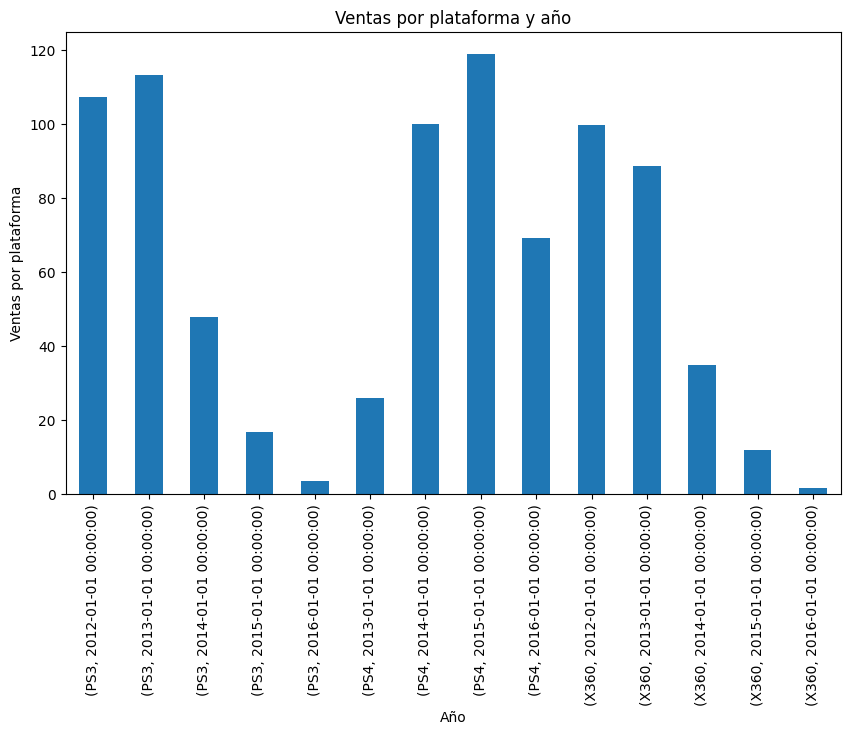

In [ ]:
more_profitable_platform = ['X360', 'PS3', 'PS4']

df_platform_growth = df_games_2012[df_games_2012['platform'].isin(more_profitable_platform)][['platform', 'year_of_release', 'total_sales']]

# Agrupa el Dataframe a partir de plataforma y año de lanzamiento y suma la ventas totales
sales_per_platform_lider_year = df_platform_growth.groupby(['platform', 'year_of_release'])['total_sales'].sum()
print(sales_per_platform_lider_year)

#Gráfica
from matplotlib import pyplot as plt

sales_per_platform_lider_year.plot(figsize=(10,6), kind='bar', title='Ventas por plataforma y año', xlabel='Año', ylabel='Ventas por plataforma')

plt.show()

**Análisis 4**

Las plataformas líderes en ventas son la X360, PS3 y PS4. Todas las plataformas experimentan un decrecimiento en el último año. Sin embargo la PS4 resulta la más rentable hasta 2016.

count      31.000000
mean      284.412581
std       343.894378
min         0.030000
25%        23.360000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64


<AxesSubplot:xlabel='total_sales'>

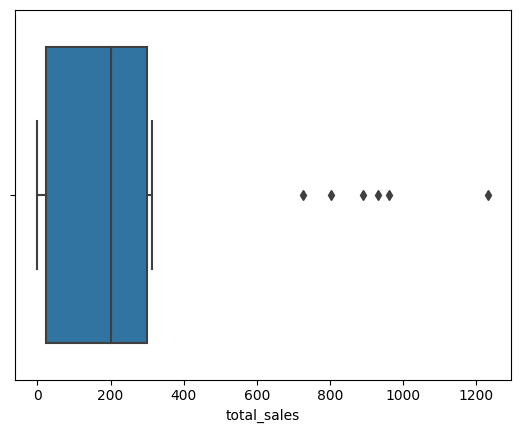

In [ ]:
print(platform_sales.describe())

# Traza un diagrama de caja para visualizar la distribución de las ventas globales
import seaborn as sns

sns.boxplot(platform_sales)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados.
</div>

<div class="alert alert-block alert-info">
    Enterado, para analisis de tendencia central sería necesario descartar los valores atípicos.

**Análisis 5**

De las 31 plataformas de la muestra el promedio de ventas es de 284, mientras que la media es de 200 siendo esta más representativa que el promedio. A su vez se observan 6 plataforma con ventas atípicas, mismas que se observaron en un analisis previo siendo las siguientes:

 Plataforma / Ventas totales
 - PS / 727.58
 - DS / 802.78
 - Wii / 891.18
 - PS3 / 931.34
 - X360 / 961.24
 - PS2 / 1233.56

                                    critic_score  total_sales
name                                                         
.hack//Infection Part 1                     75.0         1.26
.hack//Mutation Part 2                      76.0         0.67
.hack//Outbreak Part 3                      70.0         0.46
18 Wheeler: American Pro Trucker            61.0         0.40
187: Ride or Die                            52.0         0.15
...                                          ...          ...
Yanya Caballista: City Skater               58.0         0.05
Ys: The Ark of Napishtim                    72.0         0.14
Zathura                                     43.0         0.13
Zone of the Enders                          78.0         0.75
Zone of the Enders: The 2nd Runner          82.0         0.42

[1275 rows x 2 columns]
              critic_score  total_sales
critic_score      1.000000     0.392536
total_sales       0.392536     1.000000


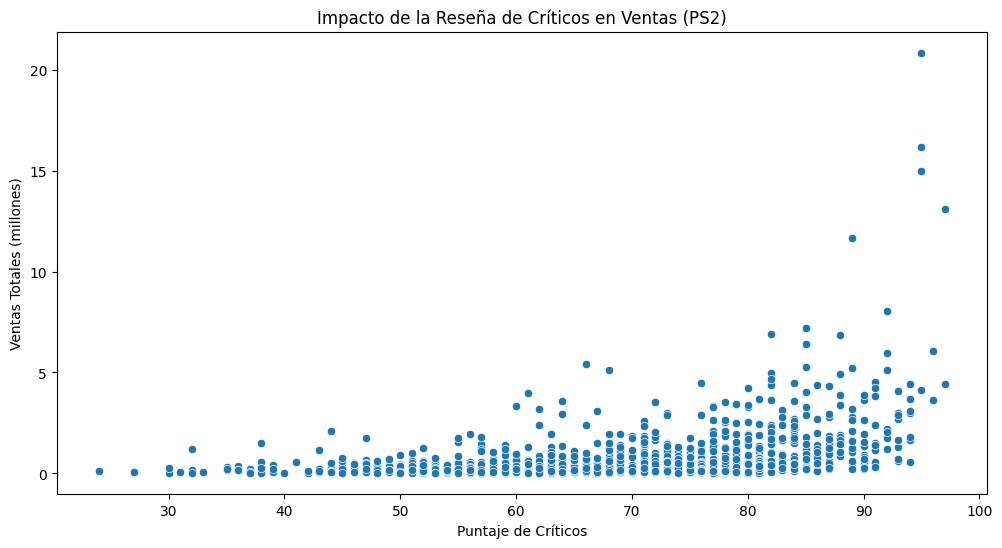

In [ ]:
# Filtra el Dataframe con los datos de la plataforma PS2
ps2_games = df_games[df_games['platform'] == 'PS2']

# Filtra el Dataframe con aquellos juegos que poseen calificación y los agrupa por nombre, promedia las criticas y las ventas totales
ps2_games_ranked = ps2_games[ps2_games['critic_score'] > 0].groupby('name')[['critic_score', 'total_sales']].mean()

print(ps2_games_ranked)

# Calcula la correlación entre las variables
print(ps2_games_ranked.corr())

# Gráfica
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=ps2_games_ranked['critic_score'], y=ps2_games_ranked['total_sales'])
plt.title('Impacto de la Reseña de Críticos en Ventas (PS2)')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.show()

**Análisis 6**

Existe una ligera correlación positiva de 0.39 entre la critica de los expertos y las ventas totales. Esta relación es más perceptible en el gráfico de dispersión, los juegos que tuvieron más ventas en general tuvieron un mayor puntaje por las critica de los expertos.

              critic_score  total_sales
critic_score      1.000000     0.230049
total_sales       0.230049     1.000000


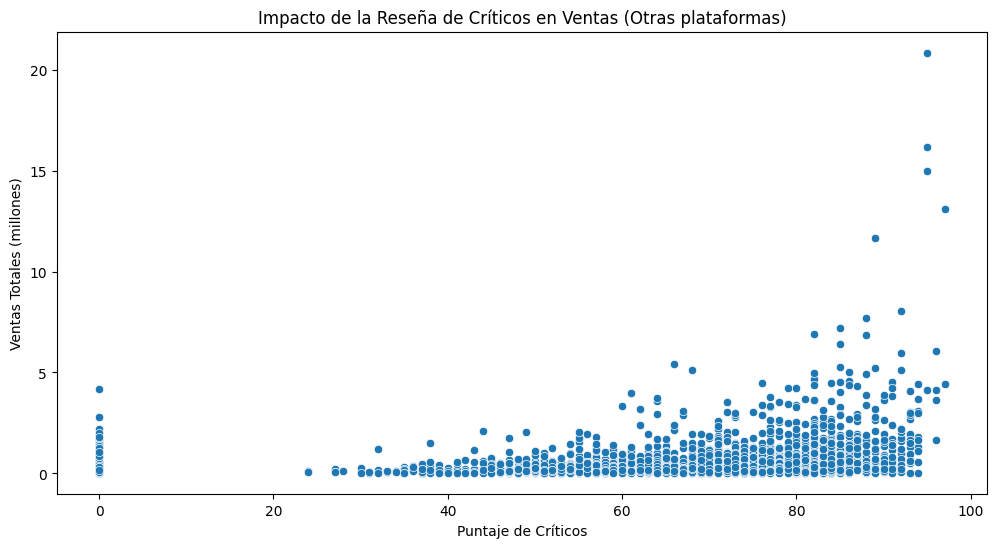

In [ ]:
# Filtra los juegos analizados de la plataforma PS2
games_analized = ps2_games[ps2_games['critic_score'] > 0]['name']
#print(games_analized)

games_analized_other_platform = df_games[df_games['name'].isin(games_analized)][['name', 'platform', 'critic_score', 'total_sales']]
#print(games_analized_other_platform)

# Calcula la correlación entre las variables
print(games_analized_other_platform.corr())

# Gráfica
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=games_analized_other_platform['critic_score'], y=games_analized_other_platform['total_sales'])
plt.title('Impacto de la Reseña de Críticos en Ventas (Otras plataformas)')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

**Análisis 7**

Comparando los mismos juegos respecto a la PS2 la muestra tiene una menor correlacion entre las variables de critica de los expertos y las ventas totales siendo esta 0.23. A su vez se observa que ambas gráficas son muy similares pero la segunda presenta un menor volumen de ventas.

In [ ]:
# Agrupa el Dataframe por genero y suma el total de ventas
profitable_genre = df_games.groupby('genre')['total_sales'].sum().sort_values()

print(profitable_genre)

genre
Unknown            2.42
Strategy         172.57
Adventure        233.33
Puzzle           239.89
Simulation       387.96
Fighting         442.66
Racing           723.49
Misc             790.29
Platform         825.55
Role-Playing     931.08
Shooter         1041.36
Sports          1309.67
Action          1716.52
Name: total_sales, dtype: float64


**Análisis 8**

Los géneros más rentables son acción, deportes y disparos, estos géneros tienden a ser más accesible al público y tienen mayor número de fanáticos. Mientras que los menos rentable son estrategia, aventura y rompecabezas, estos géneros tienden a ser más especializados y para un público de nicho, reduciendo el número de fanáticos.

## Perfil de usuario por región

In [ ]:
# Lista con las cinco plataformas más populares de 2012 a 2016
top_five_platform = ['XOne','3DS','X360', 'PS3', 'PS4']

# Filtra el Dataframe con las cinco plataformas más populares y agrupa por plataforma
market_share = df_games_2012[df_games_2012['platform'].isin(top_five_platform)].groupby('platform')

# Diccionario para procesar los datos agrupados
agg_dict = {'total_sales': 'sum',
            'jp_sales': 'mean',
            'eu_sales': 'mean',
            'na_sales': 'mean'
           }

platform_share = market_share.agg(agg_dict)

print(platform_share)

          total_sales  jp_sales  eu_sales  na_sales
platform                                           
3DS            194.61  0.221692  0.107677  0.139672
PS3            288.79  0.071582  0.216755  0.209696
PS4            314.14  0.040714  0.359923  0.277398
X360           236.54  0.005377  0.255205  0.479623
XOne           159.32  0.001377  0.208866  0.377004


**Cuotas de mercado**

 - XOne
     - Su mayor popularidad en Norteamérica con un 37% del mercado
     - Su menor popularidad en Japón con un 0.1% del mercado
 - 3DS
     - Su mayor popularidad en Japón con un 22% del mercado
     - Su menor popularidad en Europa con un 10% del mercado
 - X360
     - Su mayor popularidad en Norteamérica con un 47% del mercado
     - Su menor popularidad en Japón con un 0.5% del mercado
 - PS3
     - Su mayor popularidad en Norteamérica con un 21% del mercado
     - Su menor popularidad en Japón con un 7% del mercado
 - PS4
     - Su mayor popularidad en Norteamérica con un 35% del mercado
     - Su menor popularidad en Japón con un 4% del mercado

Se puede observar que la unica plataforma que no lidera en Norteamérica fue la 3DS. A su vez en la mayoría los casos Europa fue el segundo mercado con excepción de la 3DS.

In [ ]:
# Filtra el Dataframe con las cinco plataformas más populares y agrupa por género
genre_region = df_games_2012[df_games_2012['platform'].isin(top_five_platform)].groupby('genre')

# Diccionario para procesar los datos agrupados
agg_dict = {'total_sales': 'sum',
            'jp_sales': 'mean',
            'eu_sales': 'mean',
            'na_sales': 'mean'
           }

genre_platform = genre_region.agg(agg_dict)

print(genre_platform.sort_values(by='total_sales'))

              total_sales  jp_sales  eu_sales  na_sales
genre                                                  
Puzzle               2.72  0.080667  0.059333  0.034000
Strategy             4.79  0.053000  0.040000  0.053667
Adventure           22.68  0.032180  0.058947  0.061579
Simulation          25.16  0.208776  0.155510  0.121633
Platform            34.13  0.092264  0.236415  0.252453
Fighting            35.53  0.089277  0.105663  0.188554
Racing              42.18  0.013415  0.276829  0.158293
Misc                48.78  0.056983  0.124397  0.197069
Role-Playing       151.26  0.225982  0.173699  0.236575
Sports             167.81  0.027635  0.311823  0.382512
Shooter            282.11  0.042111  0.571500  0.758500
Action             376.25  0.062329  0.207778  0.233592


**Géneros principales**

Los cinco principales géneros fueron Acción, Disparos, Deportes, Juegos de rol y Miscelaneos.

 - Acción - es más popular en Norteamérica con un 23% y menos popular en Japón con un 6%.
 - Disparos - es más popular en Norteamérica con un 75% y menos popular en Japón con un 4%.
 - Deportes - es más popular en Norteamérica con un 38% y menos popular en Japón con un 2%.
 - Juegos de rol - es más popular en Norteamérica con un 23% y menos popular en Europa con un 17%.
 - Miscelaneos - es más popular en Norteamérica con un 19% y menos popular en Japón con un 5%.

El genéro que presenta menos variación en su popularidad en los diferentes mercados fueron los juegos de rol.

El genéro que presenta más variación en su popularidad en los diferentes mercados fueron los juegos de disparos.

In [ ]:
# Filtra el Dataframe con las cinco plataformas más populares y agrupa por clasificación
rating_region = df_games_2012[df_games_2012['platform'].isin(top_five_platform)].groupby('rating')

# Diccionario para procesar los datos agrupados
agg_dict = {'total_sales': 'sum',
            'jp_sales': 'mean',
            'eu_sales': 'mean',
            'na_sales': 'mean'
           }

rating_platform = rating_region.agg(agg_dict)

print(rating_platform.sort_values(by='total_sales'))

         total_sales  jp_sales  eu_sales  na_sales
rating                                            
E10+           98.26  0.023627  0.167745  0.235245
T             132.43  0.067045  0.143574  0.192680
E             231.82  0.073456  0.337169  0.343346
Unrated       266.82  0.112092  0.110274  0.128485
M             464.07  0.052667  0.479361  0.594750


**ESRB ratings**

Se observa que los juegos con más ventas fueron los que tuvieron clasificación M(Maduro +17), seguidos de los Unrated(clasificación pendiente), seguidos de E(Everyone / Todos), seguidos de T(Teen / Adolescentes), por último E+10(Mayores de 10 años).

Por lo que se puede concluir que la clasificación no afecta las ventas. Se puede inferir que las ventas no dependen de la clasificación si no del poder adquisitivo de los compradores, siendo los principales compradores adultos solteros, seguidos de adultos con niños, seguidos de adolescentes y por adultos con niños mayores de 10 años.

## Prueba Hipótesis

**Prueba Hipótesis 1**

 - Hipótesis nula:

    Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


 - Hipótesis alternativa:

    Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [ ]:
# Filtra la muestra por plataforma
user_score_xone = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'] != 0)]['user_score']
user_mean_score_xone = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'] != 0)].groupby('platform')['user_score'].mean()
#print(user_mean_score_xone)

# Filtra la muestra por plataforma
user_score_pc = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'] != 0)]['user_score']
user_mean_score_pc = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'] != 0)].groupby('platform')['user_score'].mean()
#print(user_mean_score_pc)

# Calcula la varianza de las muestras
xone_variance = np.var(user_score_xone, ddof=1)
pc_variance = np.var(user_score_pc, ddof=1)
print(xone_variance, 'varianza xone.')
print(pc_variance, 'varianza pc.')

# Prueba levene
levene_test = st.levene(user_score_xone, user_score_pc)
print('valor p: ', levene_test.pvalue) # Si valor p > alpha 0.5 las varianzas son iguales por lo tanto True
# Si valor p < alpha 0.5 las varianzas son diferentes por lo tanto False

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

xone_vs_pc_score = st.ttest_ind(user_score_xone, user_score_pc, equal_var=True) # realizar una prueba

print('valor p de la prueba t: ', xone_vs_pc_score.pvalue) # extraer el valor p

if xone_vs_pc_score.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

1.9069968429360695 varianza xone.
2.349224375076853 varianza pc.
valor p:  0.2795532372785057
valor p de la prueba t:  1.3037979620149106e-05
Rechazamos la hipótesis nula


**Prueba Hipótesis 2**

 - Hipótesis nula:
     
     Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

    
 - Hipótesis alternativa:

    Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
# Filtra la muestra por género
user_score_action = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'] != 0)]['user_score']
user_mean_score_action = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'] != 0)].groupby('genre')['user_score'].mean()
#print(user_mean_score_action)

# Filtra la muestra por género
user_score_sports = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'] != 0)]['user_score']
user_mean_score_sports = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'] != 0)].groupby('genre')['user_score'].mean()
#print(user_mean_score_sports)

# Calcula la varianza de las muestras
action_variance = np.var(user_score_action, ddof=1)
sports_variance = np.var(user_score_sports, ddof=1)
print(action_variance, 'varianza action.')
print(sports_variance, 'varianza sports.')

# Prueba levene
levene_test = st.levene(user_score_action, user_score_sports)
print('valor p: ', levene_test.pvalue) # Si valor p > alpha 0.5 las varianzas son iguales por lo tanto True
# Si valor p < alpha 0.5 las varianzas son diferentes por lo tanto False

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

action_vs_sports_score = st.ttest_ind(user_score_action, user_score_sports, equal_var=True) # realizar una prueba

print('valor p de la prueba t: ', action_vs_sports_score.pvalue) # extraer el valor p

if action_vs_sports_score.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

2.027493768262496 varianza action.
2.6230558125192722 varianza sports.
valor p:  8.763985507235711e-05
valor p de la prueba t:  0.06480928064420748
No podemos rechazar la hipótesis nula


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función:
    
    levene(user_score_xone, user_score_pc)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales.
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
    Gracias por la observación, me da pauta para estudiar más el tema.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Las hipotesis nulas se formulan bajo la premisa que el promedio de las muestras son iguales. Mientras que las hipotesis alternativas formla que existen diferencias entre el promedio de las muestras.

El criterio que se utilizó para probar las hipotesis fueron que el nivel de varianza no puede exceder un 5% (un rango estadístico general) superior o inferior una muestra de otra.

## Conclusiones

El análisis del mercado de videojuegos muestra un comportamiento dinámico y con tendencias marcadas en cuanto a lanzamientos, ventas y preferencias de los consumidores. Se identificó un crecimiento sostenido en la cantidad de lanzamientos hasta 2008, seguido de una reducción del 35% para 2016, lo que sugiere una posible maduración del mercado o un cambio en la estrategia de la industria.

El ciclo de vida de las plataformas de videojuegos se estima en 10 años, con un pico de ventas en el cuarto año posterior a su lanzamiento. En términos de rentabilidad, la PlayStation 4 destacó como la plataforma más rentable hasta 2016, a pesar de la tendencia decreciente en las ventas de todas las consolas en el último año analizado.

Las plataformas con mayores ventas en la muestra fueron PS2, X360, PS3, Wii, DS y PS, superando ampliamente la media y representando casos atípicos dentro del conjunto de datos. En cuanto a la relación entre críticas y ventas, se encontró una correlación positiva moderada (0.39), lo que indica que una mejor calificación por parte de los expertos puede favorecer las ventas, aunque no es el único factor determinante.

Los géneros de videojuegos con mayor rentabilidad fueron Acción, Deportes y Disparos, mientras que Estrategia, Aventura y Rompecabezas resultaron menos rentables, probablemente debido a su enfoque en nichos de mercado más reducidos. Además, se observó que la popularidad de los géneros varía según la región, con Disparos siendo el género con la mayor diferencia de preferencia entre mercados.

En términos de cuota de mercado, se evidenció que la Xbox One y la Xbox 360 dominaron en Norteamérica, mientras que la 3DS tuvo su mayor popularidad en Japón. Europa se posicionó generalmente como el segundo mercado más relevante para la mayoría de las plataformas.

En cuanto a las clasificaciones de la ESRB, los juegos con la clasificación "M" (Maduro +17) fueron los más vendidos, seguidos de aquellos sin clasificación y los dirigidos a "Todos" (E). Esto sugiere que la clasificación en sí misma no es un factor determinante en las ventas, sino más bien el perfil del comprador y su poder adquisitivo.

Por último, las pruebas de hipótesis realizadas exploraron diferencias en las calificaciones promedio de los usuarios entre plataformas y géneros, lo que podría aportar información adicional sobre las percepciones del público y sus preferencias.

En conclusión, este estudio proporciona información valiosa para la toma de decisiones estratégicas en la industria de los videojuegos, desde la selección de plataformas y géneros con mayor potencial hasta la identificación de factores clave en las ventas y preferencias del consumidor en diferentes mercados.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

José, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados.
    
*  Verificar los supuestos de las pruebas de hipótesis.
    
</div>